In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("sales.csv")
df.tail()

,index,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
df.isnull().sum()

index                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [14]:
# sua ten + xoa cot index
df = df.iloc[:, 1:]
df = df.rename(
    columns={
        "TV Ad Budget ($)": "TV",
        "Radio Ad Budget ($)": "Radio",
        "Newspaper Ad Budget ($)": "Newspaper",
        "Sales ($)": "Sales",
    }        
)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
# tinh do tuong quan
corr_TV = df["Sales"].corr(df["TV"])
corr_TV

np.float64(0.7822244248616061)

In [16]:
corr_newspaper = df["Sales"].corr(df["Newspaper"])
corr_newspaper

np.float64(0.22829902637616528)

In [17]:
corr_Radio = df["Sales"].corr(df["Radio"])
corr_Radio

np.float64(0.5762225745710551)

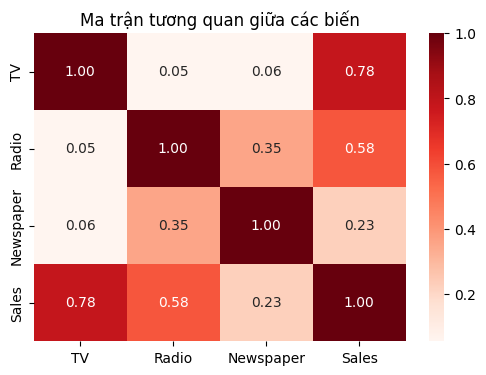

In [18]:
# ve bang tuong quan (heatmap)
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

In [19]:
# tao mo hinh: Radio
model = LinearRegression()
X = df[["Radio"]]
y = df["Sales"]
model.fit(X, y)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# tao duong hoi quy (du doan)
y_pred = model.predict(X)

In [21]:
# --- In thông tin mô hình ---
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Radio")

Hệ số hồi quy (slope): 0.20249578339243965
Hệ số chặn (intercept): 9.311638095158283
Phương trình: Sales = 9.31 + 0.20 * Radio


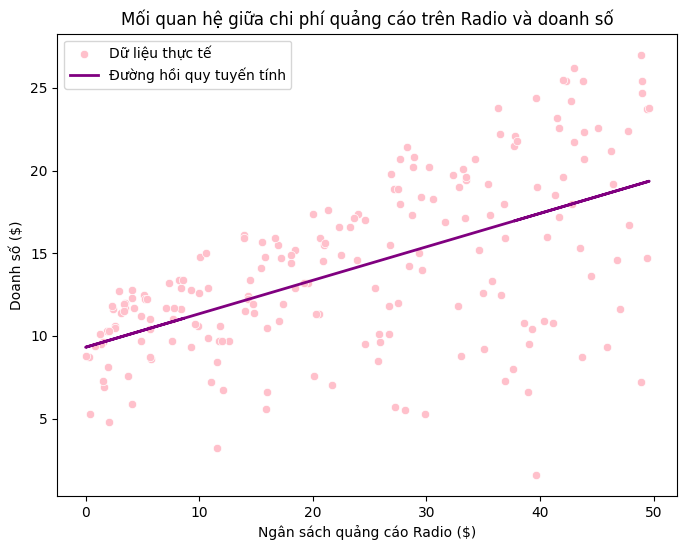

In [22]:
# ve bieu doi hoi quy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["Radio"], y=y, color="pink", label="Dữ liệu thực tế")
plt.plot(
    X["Radio"], y_pred, color="purple", linewidth=2, label="Đường hồi quy tuyến tính"
)
plt.title("Mối quan hệ giữa chi phí quảng cáo trên Radio và doanh số")
plt.xlabel("Ngân sách quảng cáo Radio ($)")
plt.ylabel("Doanh số ($)")
plt.legend()
plt.show()